Mean Squared Error: 17298765.909818854


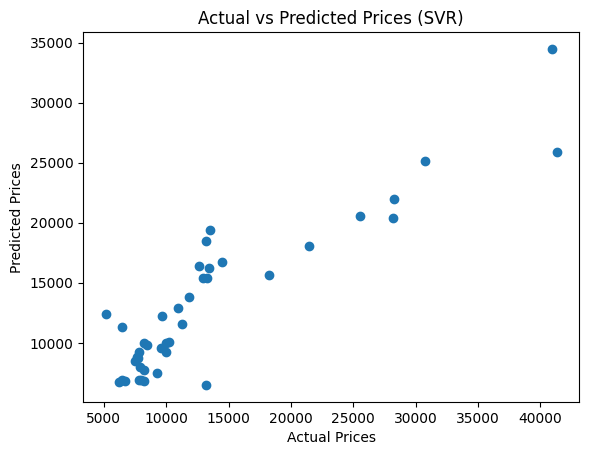

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Step 1: Load the Automobile dataset
data = pd.read_csv('/content/Automobile_data.csv')

# Step 2: Clean the data by replacing '?' with NaN and convert numeric columns to the correct type
data.replace('?', np.nan, inplace=True)

# Convert columns that should be numeric to the correct type
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'curb-weight', 'engine-size',
                   'city-mpg', 'highway-mpg', 'price']

# Convert the numeric columns to numeric type (this will handle the `?` values and turn them into NaN)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Impute missing values for numeric columns using mean strategy
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Step 4: Define features (X) and target (y)
X = data[['curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]  # Feature selection
y = data['price']  # Target is price

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Step 7: Fit SVR Model
regressor = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
regressor.fit(X_train_scaled, y_train_scaled)

# Step 8: Predict on test set
y_pred_scaled = regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 10: Visualize Results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (SVR)")
plt.show()
